In [74]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt

In [135]:
def getAcc( pos, mass, G, softening ):
    N = pos.shape[0];
    a = np.zeros((N,3));

    for i in range(N):
        for j in range(N):
            dx = pos[j,0] - pos[i,0];
            dy = pos[j,1] - pos[i,1];
            dz = pos[j,2] - pos[i,2];
            inv_r3 = (dx**2 + dy**2 + dz**2 + softening**2)**(-1.5);
            a[i,0] +=  G * (dx * inv_r3) * mass[j];
            a[i,1] +=  G * (dy * inv_r3) * mass[j];
            a[i,2] +=  G * (dz * inv_r3) * mass[j];

    return a

In [147]:
def getEnergy( pos, vel, mass, G ):
    # Kinetic Energy:
    KE = 0.5 * np.sum(np.sum( mass * vel**2 ))


    # Potential Energy:

    # positions r = [x,y,z] for all particles
    x = pos[:,0:1]
    y = pos[:,1:2]
    z = pos[:,2:3]

    # matrix that stores all pairwise particle separations: r_j - r_i
    dx = x.T - x
    dy = y.T - y
    dz = z.T - z

    # matrix that stores 1/r for all particle pairwise particle separations 
    inv_r = np.sqrt(dx**2 + dy**2 + dz**2 + 0.1)
    inv_r = 1.0/inv_r

    # sum over upper triangle, to count each interaction only once
    PE = G * np.sum(np.sum(np.triu(-(mass*mass.T)*inv_r,1)))

    return KE, PE;

In [160]:
def leapFrogCalculation(y0, masses):
    # Simulation parameters
    t         = 0        # current time of the simulation
    tEnd      = 6.221e6   # time at which simulation ends
    dt        = 3600   # timestep
    softening = 0.1    # softening length
    G         = -6.67*(10**-11)    # Newton's Gravitational Constant

    
    y0 = y0.reshape(-1, 3)
    print("y0 is: ",y0)
    
    mass = masses.reshape(-1,1)  
    pos  = y0[::2]
    vel  = y0[1::2]

    
    
    print("Positions are: ", pos)
    print("Velocities are: ", vel)
    print("Masses are: ", mass)
    
    
    # Convert to Center-of-Mass frame
#     vel -= np.mean(mass * vel,0) / np.mean(mass)

    # calculate initial gravitational accelerations
    acc = getAcc( pos, mass, G, softening )

    # calculate initial energy of system
    KE, PE  = getEnergy( pos, vel, mass, G )

    # number of timesteps
    Nt = int(np.ceil(tEnd/dt))

    # save energies, particle orbits for plotting trails
    pos_save = np.zeros((len(pos),3,Nt+1))
    pos_save[:,:,0] = pos
    KE_save = np.zeros(Nt+1)
    KE_save[0] = KE
    PE_save = np.zeros(Nt+1)
    PE_save[0] = PE
    t_all = np.arange(Nt+1)*dt

    # Simulation Main Loop
    for i in range(Nt):
        # (1/2) kick
        print("Velocities shape: ", vel.shape)
        print("Acceleration shape: ",acc.shape)
        vel += acc * dt/2.0

        # drift
        pos += vel * dt

        # update accelerations
        acc = getAcc( pos, mass, G, softening )

        # (1/2) kick
        
        vel += acc * dt/2.0

        # update time
        t += dt

        # get energy of system
        KE, PE  = getEnergy( pos, vel, mass, G )

        # save energies, positions for plotting trail
        pos_save[:,:,i+1] = pos
        KE_save[i+1] = KE
        PE_save[i+1] = PE

        return pos_save

In [161]:
# Variable declaration 1
G = -6.67*(10**-11)
t0 = 0
T = 6.221e6
dt = 3600  
y0 = np.array([3.84e8, 0, 0, 0, 1000, 0,
               0, 0, 0, 0, 0, 0])
masses = np.array([7.347e22, 5.97e24])

In [162]:
HLF = leapFrogCalculation(y0, masses)

y0 is:  [[3.84e+08 0.00e+00 0.00e+00]
 [0.00e+00 1.00e+03 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
Positions are:  [[3.84e+08 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
Velocities are:  [[   0. 1000.    0.]
 [   0.    0.    0.]]
Masses are:  [[7.347e+22]
 [5.970e+24]]
Velocities shape:  (2, 3)
Acceleration shape:  (2, 3)


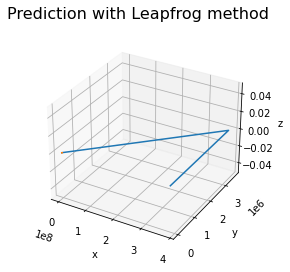

In [163]:
fig = plt.figure()
fig.suptitle('Prediction with Leapfrog method', fontsize=16)
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.plot3D(HLF[0,0,:], HLF[0,1,:], HLF[0,2,:])
ax.plot3D(HLF[1,0,:], HLF[1,1,:], HLF[1,2,:])

print()

In [155]:
print(HLF[0,0,0:100])

[3.84000000e+08 2.13389795e+09 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000